In [ ]:
import pandas as pd
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from time import strptime
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.target import FeatureCorrelation

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.datasets import cifar10
from keras.layers import Rescaling, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
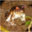

In [3]:
X_train[0]

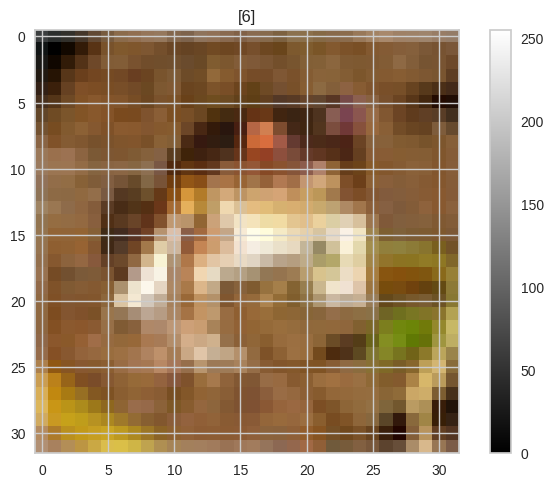

In [4]:
plt.imshow(X_train[0], 'gray')
plt.title(y_train[0])
plt.colorbar()
plt.show()

In [5]:
model = Sequential()
model.add(Rescaling(input_shape=(32, 32, 3), scale=1./255, offset=-1))
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dense(100, activation = 'elu'))
model.add(Dense(100, activation = 'elu'))
model.add(Dense(100, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


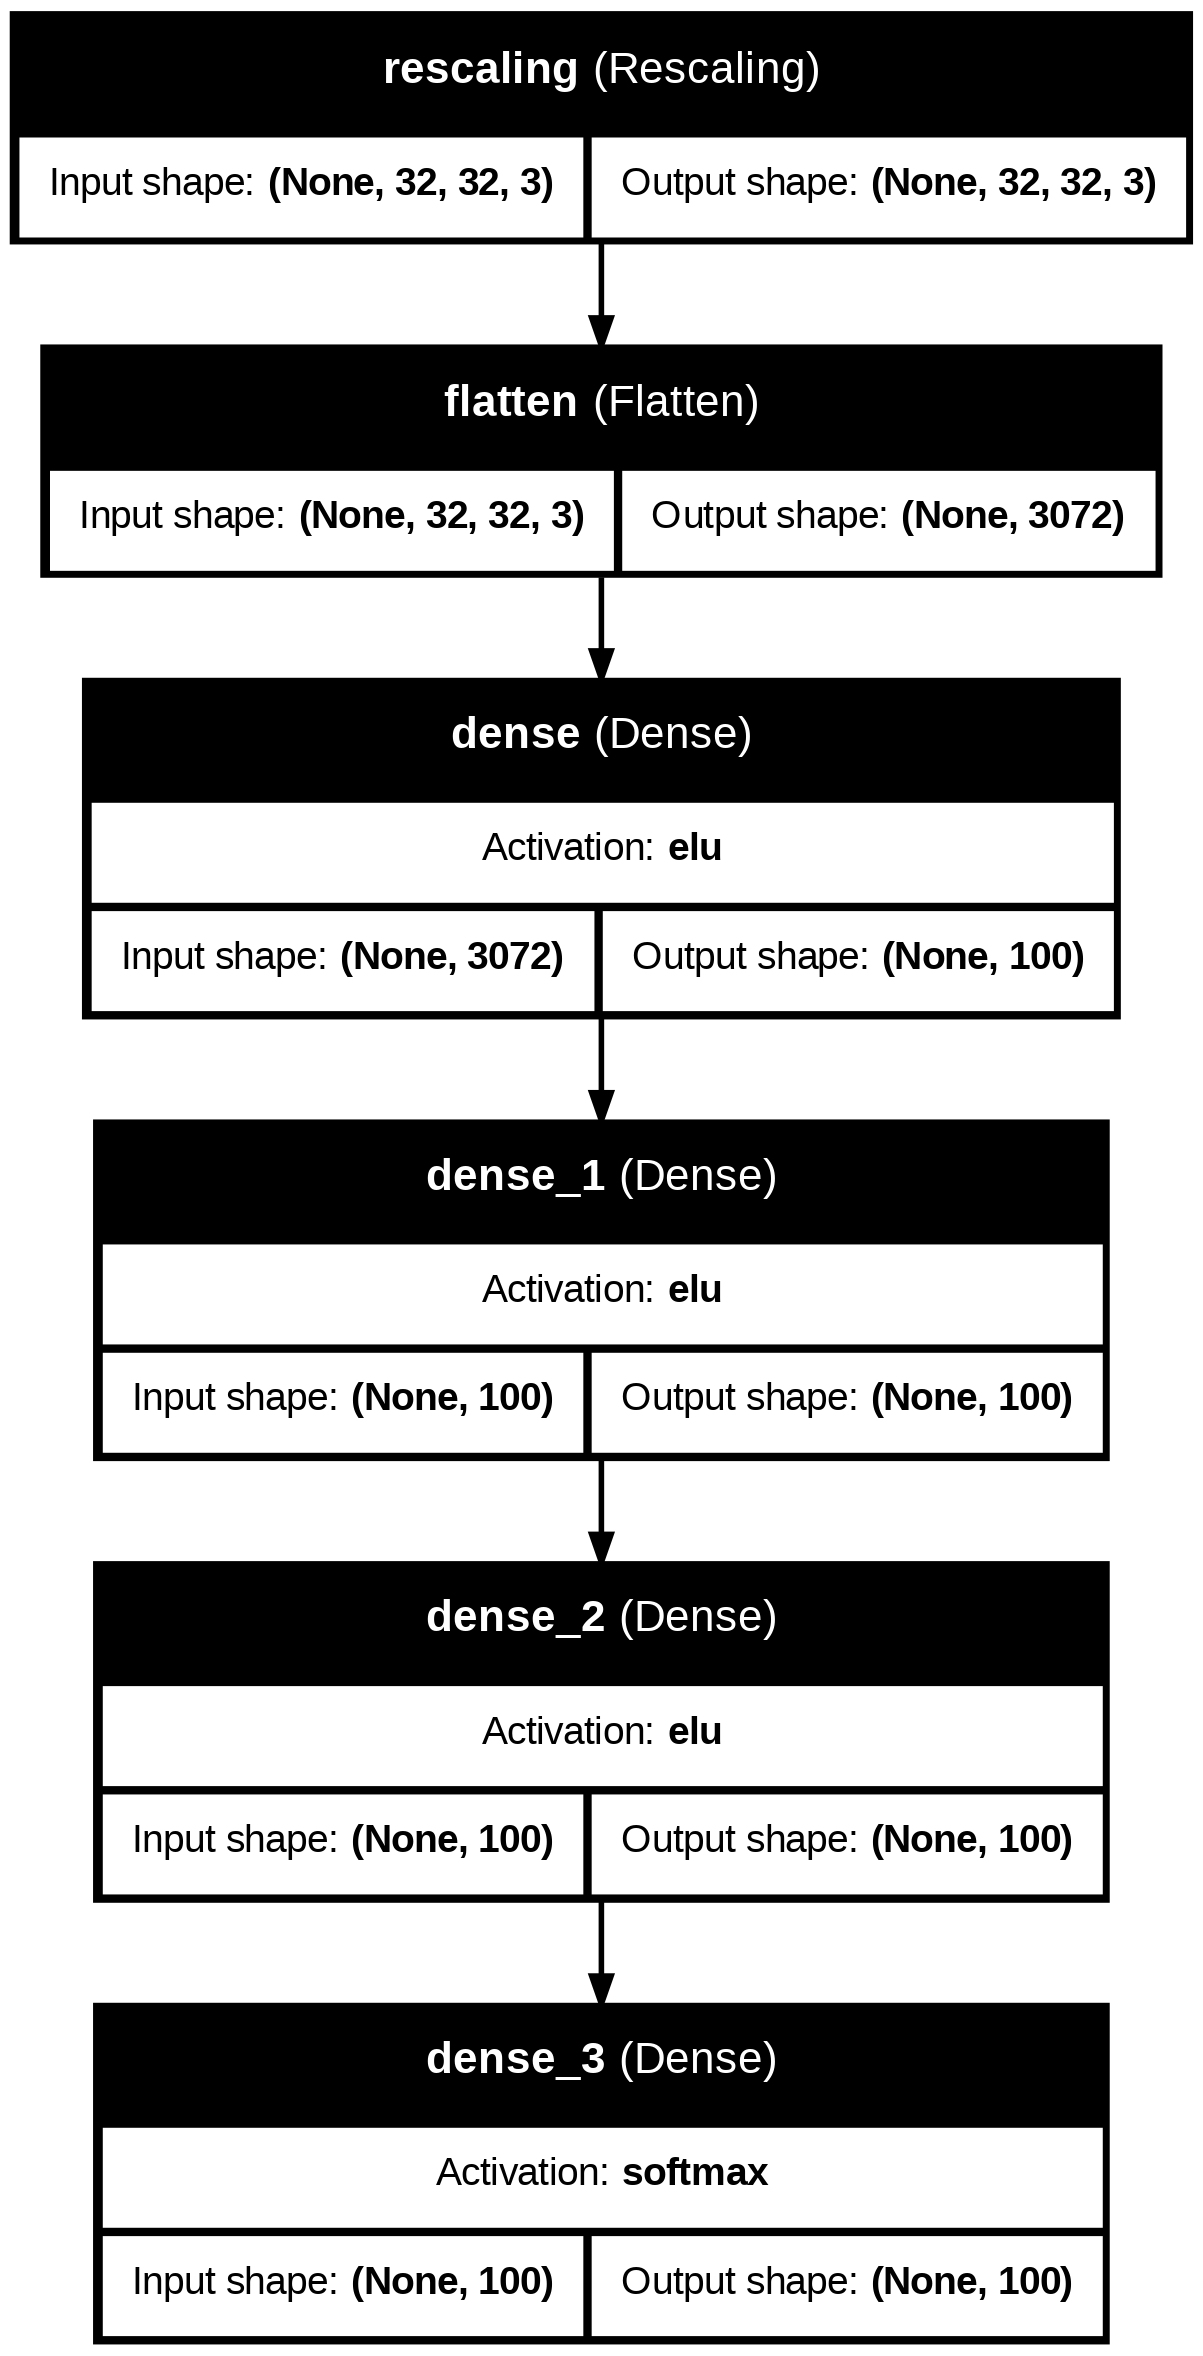

In [6]:
plot_model(model, show_shapes=True, show_dtype=False, show_layer_names=True, show_layer_activations=True)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.4)

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2723 - loss: 2.0694 - val_accuracy: 0.3747 - val_loss: 1.7353
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3875 - loss: 1.6992 - val_accuracy: 0.3823 - val_loss: 1.7475
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4205 - loss: 1.6097 - val_accuracy: 0.4357 - val_loss: 1.5868
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4478 - loss: 1.5449 - val_accuracy: 0.4239 - val_loss: 1.6043
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4611 - loss: 1.5036 - val_accuracy: 0.4326 - val_loss: 1.5903
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4812 - loss: 1.4465 - val_accuracy: 0.4530 - val_loss: 1.5531
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4922 - loss: 1.4245 - val_accuracy: 0.4624 - val_loss: 1.5072
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4987 - loss: 1.3915 - val_accu

In [16]:
cifar10_class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
print("Kategorie w zestawie danych CIFAR-10:")
for i, name in enumerate(cifar10_class_names):
    print(f"Klasa {i}: {name}")

Kategorie w zestawie danych CIFAR-10:
Klasa 0: airplane
Klasa 1: automobile
Klasa 2: bird
Klasa 3: cat
Klasa 4: deer
Klasa 5: dog
Klasa 6: frog
Klasa 7: horse
Klasa 8: ship
Klasa 9: truck


In [17]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

category_accuracies = {}
for i, class_name in enumerate(cifar10_class_names):
    class_indices = np.where(true_classes == i)
    true_labels_for_class = true_classes[class_indices]
    predicted_labels_for_class = predicted_classes[class_indices]

    if len(true_labels_for_class) > 0:
        correct_predictions = np.sum(predicted_labels_for_class == true_labels_for_class)
        accuracy = correct_predictions / len(true_labels_for_class)
        category_accuracies[class_name] = accuracy
    else:
        category_accuracies[class_name] = 0.0 #

print("\nDokładność dla każdej kategorii:")
for category, accuracy in category_accuracies.items():
    print(f"{category}: {accuracy:.4f}")

best_category = max(category_accuracies, key=category_accuracies.get)
best_accuracy = category_accuracies[best_category]

print(f"\nKategoria z najlepszą dokładnością: {best_category} (Accuracy: {best_accuracy:.4f})")


Dokładność (accuracy) dla każdej kategorii:
airplane: 0.5100
automobile: 0.5930
bird: 0.3840
cat: 0.3250
deer: 0.3300
dog: 0.3870
frog: 0.4990
horse: 0.5110
ship: 0.5440
truck: 0.4980

Kategoria z najlepszą dokładnością: automobile (Accuracy: 0.5930)


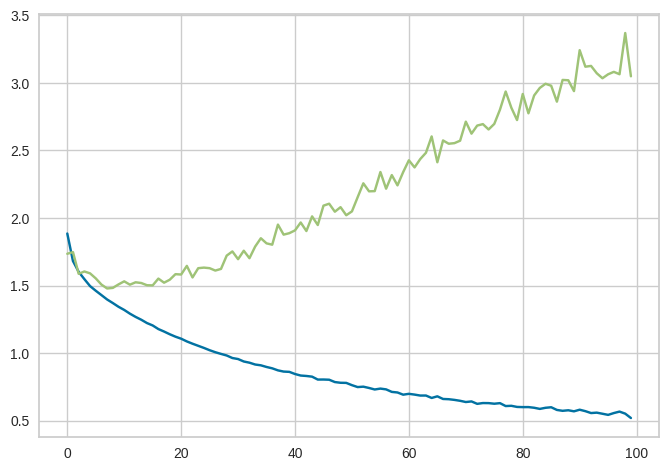

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

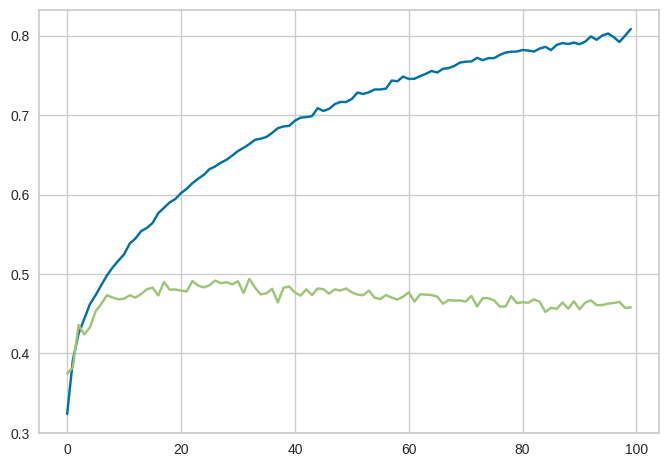

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [11]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


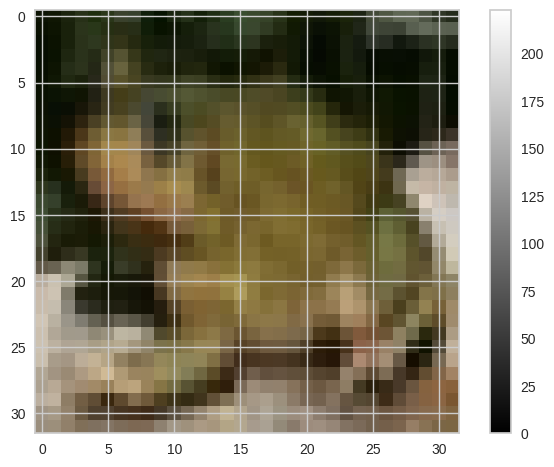

In [12]:
plt.imshow(X_test[333], cmap='gray')
plt.colorbar()

In [13]:
predictions[333]

array([8.65102038e-07, 1.97752252e-06, 1.15215303e-02, 1.44039188e-02,
       4.57061734e-03, 8.27137567e-03, 9.58902240e-01, 1.55104019e-04,
       8.62050740e-07, 2.17160326e-03, 2.18613177e-24, 5.24721836e-24,
       7.72485484e-25, 1.65729547e-23, 7.58704772e-23, 1.75750526e-23,
       4.44941432e-26, 4.24818854e-26, 6.97784389e-24, 2.41280326e-24,
       6.78903240e-24, 1.15184352e-24, 2.31261280e-23, 1.96306242e-24,
       1.89245796e-25, 4.21752749e-25, 1.45452866e-24, 1.20068278e-24,
       4.14255553e-24, 1.97239928e-25, 1.03783280e-24, 1.96639772e-24,
       4.15202935e-25, 3.33804446e-25, 7.88144891e-26, 1.42893347e-24,
       3.42804092e-25, 2.03540013e-23, 4.00989585e-25, 2.85543414e-23,
       2.51022862e-25, 1.94920548e-24, 4.65086900e-25, 1.27620616e-23,
       4.63724537e-25, 2.95549234e-26, 2.49180709e-24, 6.67765875e-25,
       8.47348433e-25, 1.22055429e-24, 8.27656592e-25, 1.79065765e-24,
       2.14698356e-23, 6.10287977e-23, 3.30969512e-24, 1.43816433e-24,
      

In [14]:
np.argmax(predictions[333])

np.int64(6)

In [15]:
y_test[333]

array([6], dtype=uint8)